# Plot Training Data

Import packages

In [9]:
from packaging import version

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

import scienceplots
mpl.rc_file_defaults()
mpl.rcParams['figure.dpi'] = 300

In [2]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.12.1


In [3]:
print("Loading Data from Experiment")
experiment_id = "s3uzotOOQoCBkGQxtPbELg"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()

# Select only the rows where the "tag" column has the values "rollout/ep_len_mean" or "rollout/ep_rew_mean"
df = df[df['tag'].isin(['rollout/ep_len_mean', 'rollout/ep_rew_mean'])]
df = tb.data.experimental.utils.pivot_dataframe(df)

# Rename the columns to "ep_len_mean" and "ep_rew_mean"
df = df.rename(columns={'rollout/ep_len_mean': 'ep_len_mean', 'rollout/ep_rew_mean': 'ep_rew_mean'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   run          4900 non-null   object 
 1   step         4900 non-null   int64  
 2   ep_len_mean  4900 non-null   float64
 3   ep_rew_mean  4900 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 153.2+ KB


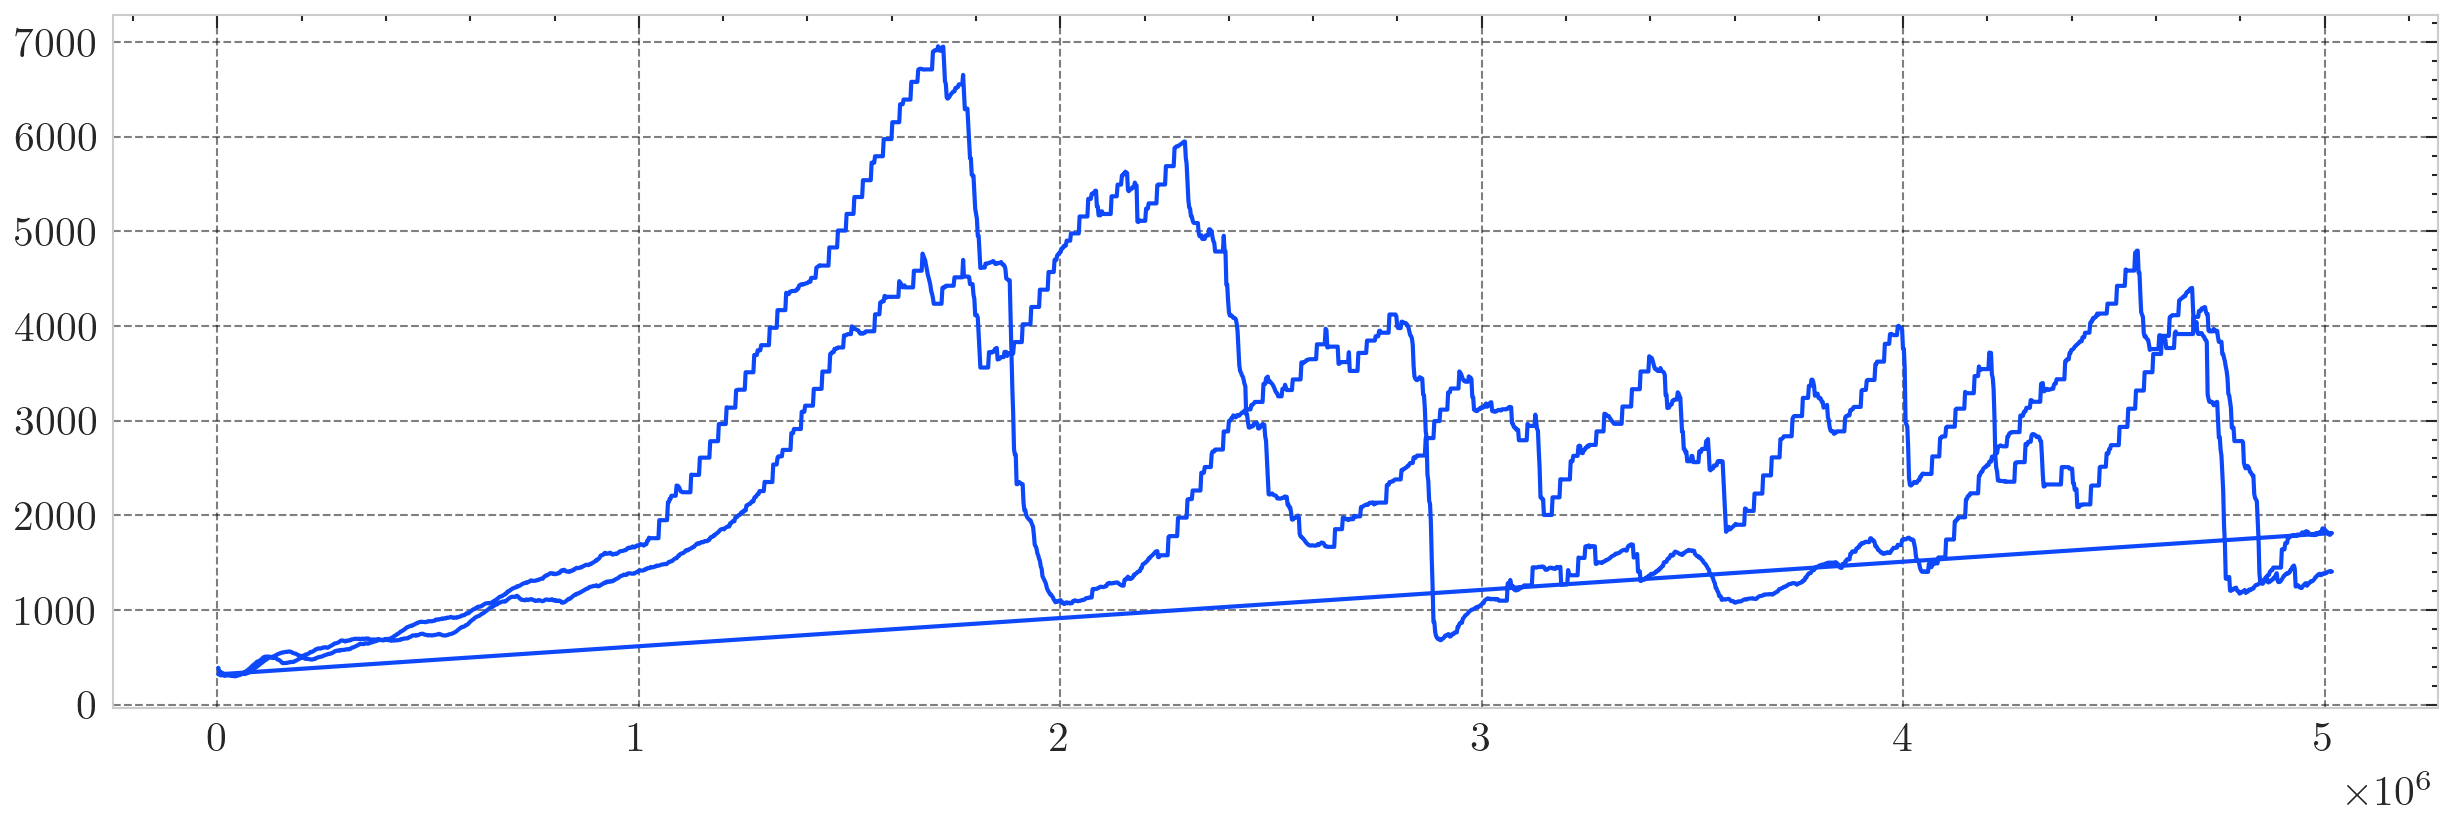

In [8]:
plt.style.use(['science', 'grid', 'high-vis'])

plt.rcParams['figure.figsize'] = [10, 3]
plt.plot(df["step"], df["ep_len_mean"])
plt.show()

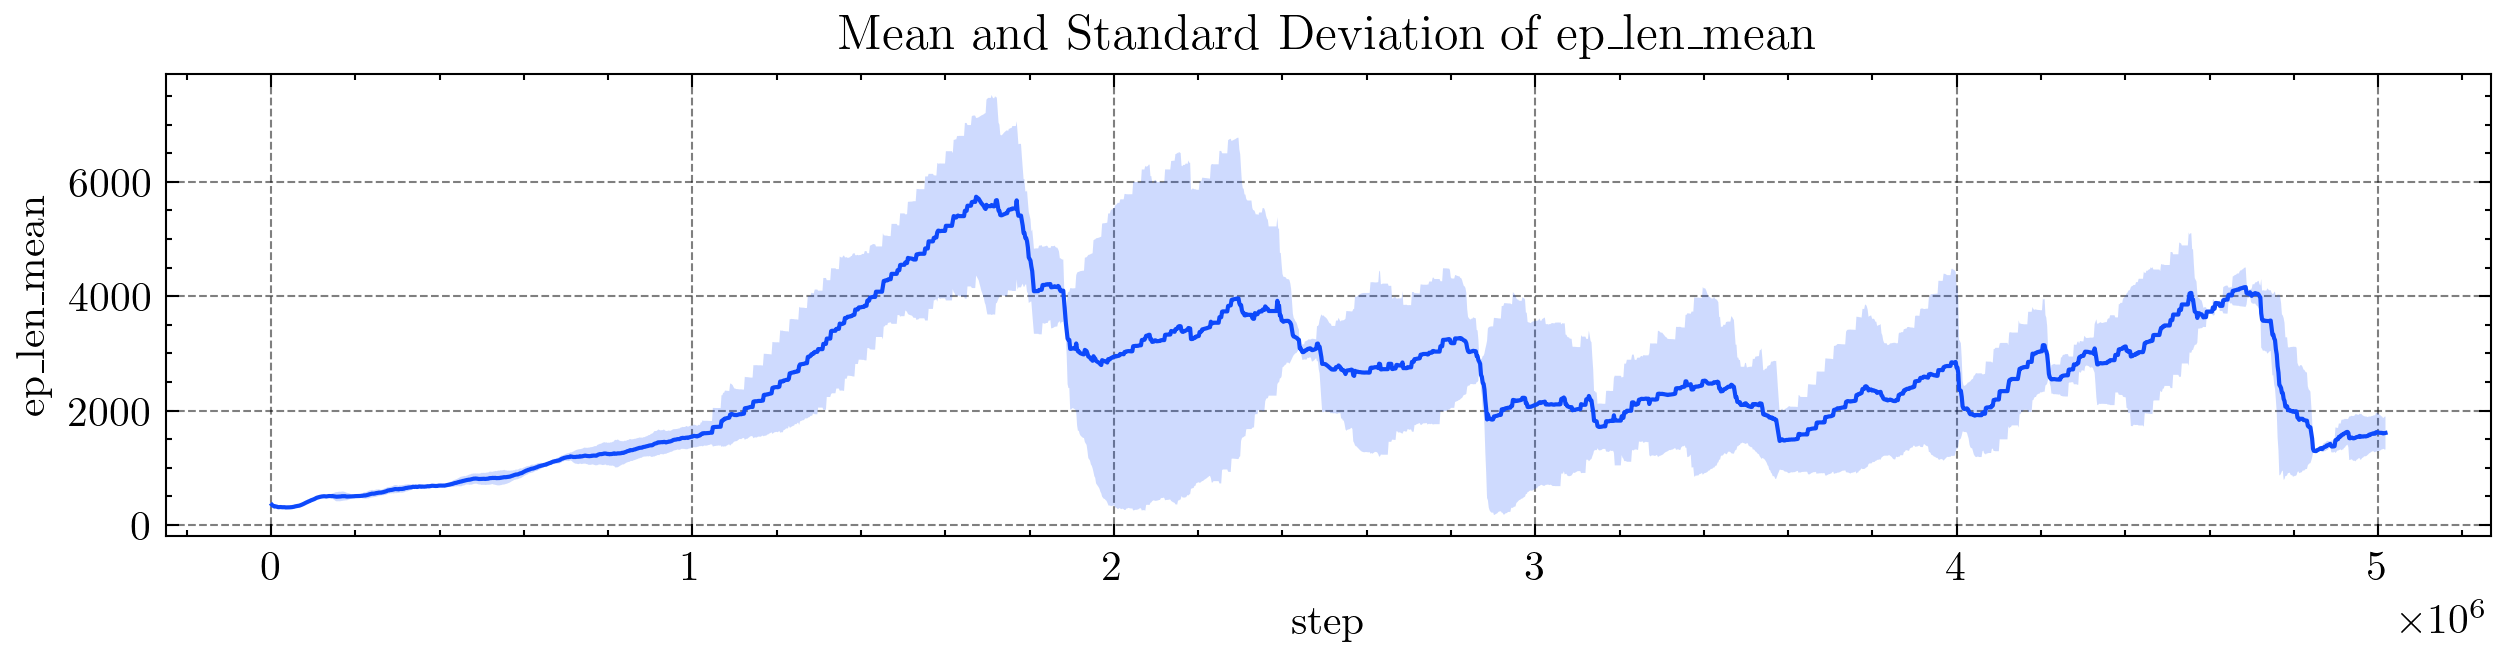

In [15]:
plt.style.use(['science', 'grid', 'high-vis'])

# Group the data by the "step" column and compute the mean and standard deviation of the "ep_len_mean" column for each group
grouped_df = df.groupby('step')['ep_len_mean'].agg(['mean', 'std'])

# Reset the index to make "step" a regular column
grouped_df = grouped_df.reset_index()

# Extract the mean and standard deviation values as NumPy arrays
mean_values = grouped_df['mean'].values
std_values = grouped_df['std'].values

# Create a Matplotlib figure and axis object
plt.rcParams['figure.figsize'] = [10, 2]
fig, ax = plt.subplots()

# Plot the mean value of the "ep_len_mean" column
ax.plot(grouped_df['step'], mean_values)

# Shade the region +/- one standard deviation away from the mean
ax.fill_between(grouped_df['step'], mean_values - std_values, mean_values + std_values, alpha=0.2)

# Set the title and axis labels
ax.set_title("Mean and Standard Deviation of ep_len_mean")
ax.set_xlabel("step")
ax.set_ylabel("ep_len_mean")

plt.show()